<a href="https://colab.research.google.com/github/Amon52/Amon/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### WALUSIMBI AMON .C.  S24B38/036  B28406

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#loading dataframe and viewing it
df=pd.read_excel('diamonds_new.xlsx')
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [ ]:
#checking for missing values
df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#Checking for no of rows and columns
df.shape

(53920, 10)

In [ ]:
#Eliminating duplicates to reduce data redundancy
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#Shape after removing duplicates
df.shape

(53774, 10)

In [ ]:
#Checking normality of columns price and carat that I am interested in
df.describe()

,price,carat,depth,table,x,y,z
count,53774.000000,53774.000000,53774.000000,53774.000000,53774.000000,53774.000000,53774.000000
mean,3933.759512,0.797859,61.748235,57.457693,5.731395,5.734831,3.538834
std,3988.639457,0.473440,1.429700,2.233114,1.120741,1.141267,0.705074
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5328.750000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


Text(0.5, 1.0, 'A scatter plt showing relationship between Price and Carat')

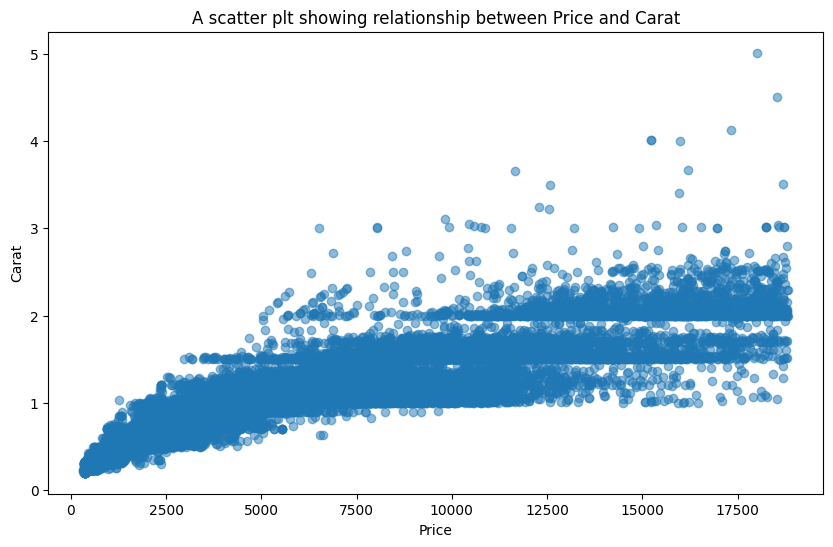

In [ ]:
# Use the dataset to test the hypothesis that average PRICE of all carat categories are the same

#Visualizing the relationship
plt.figure(figsize=(10,6))
plt.scatter(df['price'],df['carat'],alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Carat')
plt.title("A scatter plt showing relationship between Price and Carat")

The positive trajection shows an evident correlation between Price and carat

In [ ]:
#Determining the level of correlation

correlation_matrix=df[['price','carat']].corr()
correlation_matrix
print('This evidently shows a strong positive correlation of 0.921547')

This evidently shows a strong positive correlation of 0.921547


In [ ]:
#Testing  hypothesis that average price of all carat categories are the same
#Using an Anova Function to determine the correlation of price and carat
def FunctionAnova(inpdata,Target,Continous_Variable):
    from scipy.stats import f_oneway
    SelectedPredictor=[]
    for predictor in Continous_Variable:
        Group=inpdata.groupby(predictor)[Target].apply(list)
        AnovaResult=f_oneway(*Group)
        if (AnovaResult[1]<0.05):
            print(predictor,'is corelated with',Target,'having a P-Value',AnovaResult[1])
            SelectedPredictor.append(predictor)
        else:
            print(predictor,'is not corelated with',Target,'having a P-Value',AnovaResult[1])
    return (SelectedPredictor)

In [ ]:
column=['carat']
FunctionAnova(inpdata=df,
              Target='price',
              Continous_Variable=column)

carat is corelated with price having a P-Value 0.0


['carat']

### From the three tests, the H1 hypothesis stands that average price of all carat categories is the same

#### WALUSIMBI AMON .C. S24B38/036